# Методы зеркальных отображений в задачах выпуклой оптимизации

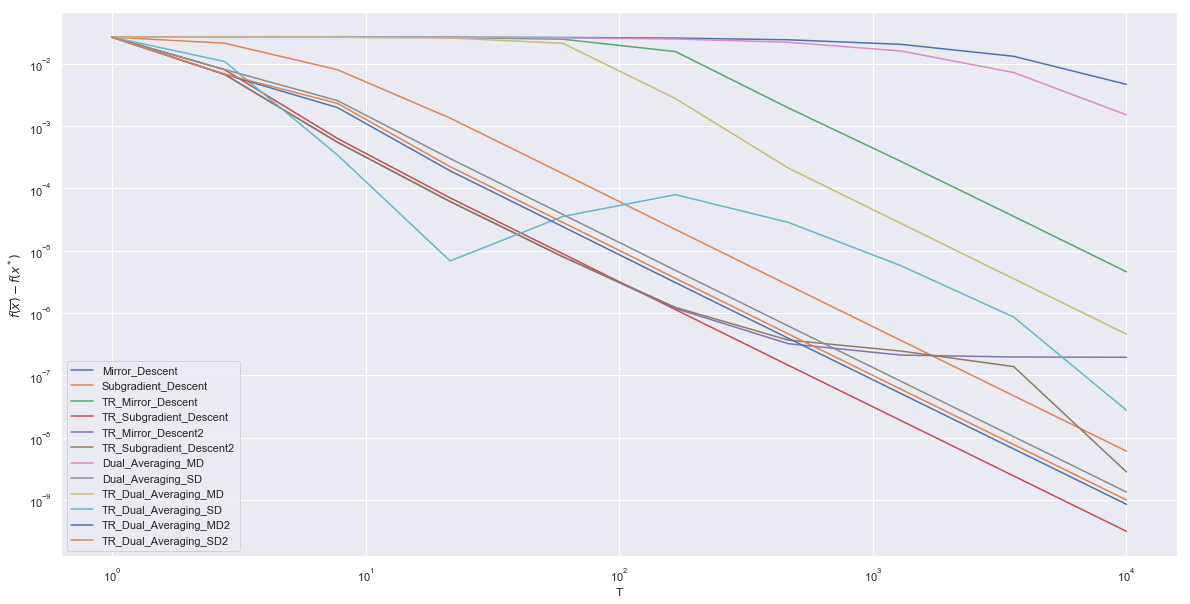

In [16]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


Ts = np.logspace(0,4, 10)
m = 10
n = 1000
A = np.random.randn(m, n)
x_true = np.random.randn(n)
x_true[x_true < 0] = 0
x_true = x_true/(np.linalg.norm(x_true, 1))

b = A.dot(x_true)

x0 = np.ones(n)
x0 = x0/np.linalg.norm(x0, 1)


def f(x):
    return (np.linalg.norm(A.dot(x) - b, 2))**2

def grad(x):
    return 2*((A.T).dot(A.dot(x)-b))

def mirror_descent(x0, grad, T):
    n = len(x0)
    M = np.log(n)
#     G = np.linalg.norm(A,np.inf)*1+np.linalg.norm(b,np.inf)
#     alpha = np.sqrt(2*M/(G**2*T))
#    L = np.linalg.norm(2*(A.T).dot(A),1)
    alpha = 0.0001
    xk = x0
    sequence = []
#     print('MD %.3f'%alpha)
    for i in range(int(T)):
        sequence.append(xk)
        g = grad(xk)
        xk = xk * np.exp(-alpha * g) / np.sum(xk * np.exp(-alpha * g))
    return sequence


def dual_averaging(x0, grad, T):
    n = len(x0)
    M = np.log(n)
#     G = np.linalg.norm(A,np.inf)*1+np.linalg.norm(b,np.inf)
#     alpha = np.sqrt(2*M/(G**2*T))
    G = np.linalg.norm(2*(A.T).dot(A),np.inf)+np.linalg.norm(2*(A.T).dot(b),np.inf)
    gamma = G/np.sqrt(2*M)
#    ro = np.sqrt(2*M)
#    gamma = 1/ro
    xk = x0
    s = np.zeros(n)
    beta = 1
    sequence = []
#     print('MD %.3f'%alpha)
    for i in range(int(T)):
        sequence.append(xk)
        g = grad(xk)
        blambda = 1
#        blambda = 1/np.linalg.norm(g,np.inf)
        s = s + g*blambda
        beta_k = beta*gamma 
        xk = x0* np.exp(-s/beta_k) / np.sum(x0* np.exp(-s/beta_k))
        beta = beta+1/beta
    return sequence


def tr_dual_averaging(x0, grad, T):
    n = len(x0)
    M = np.log(n)
    L = np.linalg.norm(2*(A.T).dot(A),1)
    G = np.linalg.norm(2*(A.T).dot(A),np.inf)+np.linalg.norm(2*(A.T).dot(b),np.inf)
    gamma = G/np.sqrt(2*M)
#    ro = np.sqrt(2*M)
#    gamma = 1/ro
    s = np.zeros(n)
    beta = 1
    alpha_k =0
#    print('GD %.5f'%alpha)
    zk = x0
    xk = x0    
    yk = x0
    Ak = alpha_k
    sequence = []
    for i in range(int(T)):
#        print(Ak)
#        print (f(zk)-f(x_true))
        alpha_k = 1/(2*L)+np.sqrt(1/(4*L*L)+alpha_k**2)
        zk = (alpha_k*xk+Ak*yk)/(alpha_k+Ak)
        alpha = alpha_k
        g = grad(zk) 
        blambda = 1
        blambda = 1/np.linalg.norm(g,np.inf)
        s = s + g*blambda
        beta_k = beta*gamma/(alpha_k*L) 
        xk = x0* np.exp(-s/beta_k) / np.sum(x0* np.exp(-s/beta_k))
        beta = beta+1/beta
        
        yk = (alpha_k*xk+Ak*yk)/(alpha_k+Ak)
        Ak += alpha_k
        sequence.append(zk)
    return sequence


def tr_dual_averaging2(x0, grad, T):
    n = len(x0)
    M = np.log(n)
    L = np.linalg.norm(2*(A.T).dot(A),1)
    G = np.linalg.norm(2*(A.T).dot(A),np.inf)+np.linalg.norm(2*(A.T).dot(b),np.inf)
    gamma = G/np.sqrt(2*M)
    ro = np.sqrt(2*M)
    gamma = 1/ro
    s = np.zeros(n)
    alpha_k =1/L
    beta = 1
    zk = x0
    xk = x0    
    yk = x0
    sequence = []
    for i in range(int(T)):
#        print(Ak)
#        print (f(zk)-f(x_true))
        znam = (xk-yk).dot(grad(xk)-grad(yk))
        if znam == 0:
            alpha_k = 0 #от этого значения график прям прет
        else:
            alpha_k = -(xk-yk).dot(grad(yk))/znam
        zk = (alpha_k*xk+(1-alpha_k)*yk)
        g = grad(zk)
        blambda = 1
        blambda = 1/np.linalg.norm(g,np.inf)
        
        s = s + g*blambda
        beta_k = beta*gamma
        xk = x0* np.exp(-s/beta_k) / np.sum(x0* np.exp(-s/beta_k))
        beta = beta+1/beta
        
        yk = (alpha_k*xk+(1-alpha_k)*yk)
        sequence.append(zk)
    return sequence


def tr_mirror_descent(x0, grad, T):
    n = len(x0)
    L = np.linalg.norm(2*(A.T).dot(A),1)
#    print(L)
#    M = np.log(n)
#    G = np.linalg.norm(A,np.inf)+np.linalg.norm(b,np.inf)
#    alpha = np.sqrt(2*M/(G**2*T))
#    alpha = 0.0001
    beta_k =0
#    print('GD %.5f'%alpha)
    zk = x0
    xk = x0    
    yk = x0
    Ak = beta_k
    sequence = []
    for i in range(int(T)):
#        print(Ak)
#        print (f(zk)-f(x_true))
        beta_k = 1/(2*L)+np.sqrt(1/(4*L*L)+beta_k**2)
        zk = (beta_k*xk+Ak*yk)/(beta_k+Ak)
        alpha = beta_k
        g = grad(zk) 
        xk = xk * np.exp(-alpha * g)/ np.sum(xk * np.exp(-alpha * g))
        
        yk = (beta_k*xk+Ak*yk)/(beta_k+Ak)
        Ak += beta_k
        sequence.append(zk)
    return sequence


def tr_mirror_descent2(x0, grad, T):
    n = len(x0)
    L = np.linalg.norm(2*(A.T).dot(A),1)
#    M = np.log(n)
#    G = np.linalg.norm(A,np.inf)+np.linalg.norm(b,np.inf)
#    alpha = np.sqrt(2*M/(G**2*T))
    alpha = 0.0001
    beta_k =1/L
#    print('GD %.5f'%alpha)
    zk = x0
    yk = x0
    xk = x0
    sequence = []
    for i in range(int(T)):
        znam = (xk-yk).dot(grad(xk)-grad(yk))
        if znam == 0:
            beta_k = 0 #от этого значения график прям прет
        else:
            beta_k = -(xk-yk).dot(grad(yk))/znam
#        if beta_k > 1:
#            beta_k = 1
#        elif beta_k < 0:
#            beta_k = 0
#        print(beta_k)
        zk = beta_k*xk+(1-beta_k)*yk
        g = grad(zk) 
        xk = xk * np.exp(-alpha * g) #/ np.sum(xk * np.exp(-alpha * g))
        xk = xk/(np.linalg.norm(xk, 1))
        
        yk = beta_k*xk+(1-beta_k)*yk
        sequence.append(zk)
    return sequence


def projection_subgradient_descent(x0, grad, T):
    n = len(x0)
#    M = 0.5
    L = np.linalg.norm(2*(A.T).dot(A),2)
#    G = np.linalg.norm(A,2)*1+np.linalg.norm(b,2)
#    alpha = np.sqrt(2*M/(G**2*T))
    alpha = 0.0001
#    print('GD %.5f'%alpha)
    xk = x0
    sequence = []
    for i in range(int(T)):
        sequence.append(xk)
        g = grad(xk) 
        xk = xk - alpha*g
        xk[xk<0] = 0
        xk = xk/(np.linalg.norm(xk, 1))
    return sequence


def dual_averaging_subgrad(x0, grad, T):
    n = len(x0)
    M = 0.5
#     G = np.linalg.norm(A,np.inf)*1+np.linalg.norm(b,np.inf)
#     alpha = np.sqrt(2*M/(G**2*T))
    G = np.linalg.norm(2*(A.T).dot(A),2)+np.linalg.norm(2*(A.T).dot(b),2)
    gamma = G/np.sqrt(2*M)
#    ro = np.sqrt(2*M)
#    gamma = 1/ro
    xk = x0
    s = np.zeros(n)
    beta = 1
    sequence = []
#     print('MD %.3f'%alpha)
    for i in range(int(T)):
        sequence.append(xk)
        g = grad(xk)
        blambda = 1
#        blambda = 1/np.linalg.norm(g,np.inf)
        s = s + g*blambda
        beta_k = beta*gamma 
        xk = x0 - s/beta_k
        xk[xk<0] = 0
        xk = xk/(np.linalg.norm(xk, 1))
        beta = beta+1/beta
    return sequence

def tr_dual_averaging_subgrad(x0, grad, T):
    n = len(x0)
    M = 0.5
    L = np.linalg.norm(2*(A.T).dot(A),2)
    G = np.linalg.norm(2*(A.T).dot(A),2)+np.linalg.norm(2*(A.T).dot(b),2)
    gamma = G/np.sqrt(2*M)
#    ro = np.sqrt(2*M)
#    gamma = 1/ro
    s = np.zeros(n)
    beta = 1
    alpha_k =0
#    print('GD %.5f'%alpha)
    zk = x0
    xk = x0    
    yk = x0
    Ak = alpha_k
    sequence = []
    for i in range(int(T)):
#        print(Ak)
#        print (f(zk)-f(x_true))
        alpha_k = 1/(2*L)+np.sqrt(1/(4*L*L)+alpha_k**2)
        zk = (alpha_k*xk+Ak*yk)/(alpha_k+Ak)
        alpha = alpha_k
        g = grad(zk) 
        blambda = 1
        blambda = 1/np.linalg.norm(g,np.inf)
        s = s + g*blambda
        beta_k = beta*gamma/(alpha_k*L) 
        xk = x0 - s/beta_k
        xk[xk<0] = 0
        xk = xk/(np.linalg.norm(xk, 1))
        beta = beta+1/beta
        
        yk = (alpha_k*xk+Ak*yk)/(alpha_k+Ak)
        Ak += alpha_k
        sequence.append(zk)
    return sequence


def tr_dual_averaging_subgrad2(x0, grad, T):
    n = len(x0)
    M = 0.5
    L = np.linalg.norm(2*(A.T).dot(A),2)
    G = np.linalg.norm(2*(A.T).dot(A),2)+np.linalg.norm(2*(A.T).dot(b),2)
    gamma = G/np.sqrt(2*M)
    ro = np.sqrt(2*M)
    gamma = 1/ro
    s = np.zeros(n)
    alpha_k =1/L
    beta = 1
    zk = x0
    xk = x0    
    yk = x0
    sequence = []
    for i in range(int(T)):
#        print(Ak)
#        print (f(zk)-f(x_true))
        znam = (xk-yk).dot(grad(xk)-grad(yk))
        if znam == 0:
            alpha_k = 0 #от этого значения график прям прет
        else:
            alpha_k = -(xk-yk).dot(grad(yk))/(xk-yk).dot(grad(xk)-grad(yk))
        zk = (alpha_k*xk+(1-alpha_k)*yk)
        g = grad(zk)
        blambda = 1
        blambda = 1/np.linalg.norm(g,np.inf)
        
        s = s + g*blambda
        beta_k = beta*gamma
        xk = x0 - s/beta_k
        xk[xk<0] = 0
        xk = xk/(np.linalg.norm(xk, 1))
        beta = beta+1/beta
        
        yk = (alpha_k*xk+(1-alpha_k)*yk)
        sequence.append(zk)
    return sequence

def tr_projection_subgradient_descent(x0, grad, T):
    n = len(x0)
    L = np.linalg.norm(2*(A.T).dot(A),2)
    M = 0.5
#    G = np.linalg.norm(A,2)*1+np.linalg.norm(b,2)
#    alpha = np.sqrt(2*M/(G**2*T))
    alpha = 0.0001
    beta_k =0
#    print('GD %.5f'%alpha)
    zk = x0 
    xk = x0
    yk = xk
    Ak = beta_k
    sequence = []
    for i in range(int(T)):

#        print (f(zk)-f(x_true))
        beta_k = 1/(2*L)+np.sqrt(1/(4*L*L)+beta_k**2)
        zk = (beta_k*xk+Ak*yk)/(beta_k+Ak)
        alpha = beta_k
        g = grad(zk) 
        xk = xk - alpha*g
        xk[xk<0] = 0
        xk = xk/(np.linalg.norm(xk, 1))
        yk = (beta_k*xk+Ak*yk)/(beta_k+Ak)
        Ak += beta_k
        sequence.append(zk)
    return sequence


def tr_projection_subgradient_descent2(x0, grad, T):
    n = len(x0)
    L = np.linalg.norm(2*(A.T).dot(A),2)
#    M = 0.5
#    G = np.linalg.norm(A,2)*1+np.linalg.norm(b,2)
#    alpha = np.sqrt(2*M/(G**2*T))
    alpha = 0.0001
    beta_k =1/L
#    print('GD %.5f'%alpha)
    zk = x0
    yk = x0
    xk = x0
    sequence = []
    for i in range(int(T)):

        znam = (xk-yk).dot(grad(xk)-grad(yk))
        if znam == 0:
            beta_k = 0 #от этого значения график прям прет
        else:
            beta_k = -(xk-yk).dot(grad(yk))/(xk-yk).dot(grad(xk)-grad(yk))
#        if beta_k > 1:
#            beta_k = 1
#        elif beta_k < 0:
#            beta_k = 0
#        print(beta_k)
        zk = beta_k*xk+(1-beta_k)*yk
        g = grad(zk) 
        xk = xk - alpha*g
        xk = xk/(np.linalg.norm(xk, 1))
        
        yk = beta_k*xk+(1-beta_k)*yk
        sequence.append(zk)        
    return sequence


result_md = []
result_da = []
result_das = []
result_tdas = []
result_tdas2 = []
result_tda = []
result_tda2 = []
result_gd = []
result_tgd = []
result_tmd = []
result_tmd2 = []
result_tgd2 = []

for T in Ts:

    md_T = mirror_descent(x0, grad, T)
    da_T = dual_averaging(x0, grad, T)
    das_T = dual_averaging_subgrad(x0, grad, T)
    tdas_T = tr_dual_averaging_subgrad(x0, grad, T)
    tdas2_T = tr_dual_averaging_subgrad2(x0, grad, T)
    tda_T = tr_dual_averaging(x0, grad, T)
    tda2_T = tr_dual_averaging2(x0, grad, T)
    tmd_T = tr_mirror_descent(x0, grad, T)
    tmd2_T = tr_mirror_descent2(x0, grad, T)
    gd_T = projection_subgradient_descent(x0, grad, T)
    tgd_T = tr_projection_subgradient_descent(x0, grad, T)
    tgd2_T = tr_projection_subgradient_descent2(x0, grad, T)
    
    x_md = np.mean(md_T, axis = 0)
    x_da = np.mean(da_T, axis = 0)
    x_das = np.mean(das_T, axis = 0)
    x_tdas = np.mean(tdas_T, axis = 0)
    x_tdas2 = np.mean(tdas2_T, axis = 0)
    x_tda = np.mean(tda_T, axis = 0)
    x_tda2 = np.mean(tda2_T, axis = 0)
    x_tmd = np.mean(tmd_T, axis = 0)
    x_tmd2 = np.mean(tmd2_T, axis = 0) 
    x_gd = np.mean(gd_T, axis = 0)
    x_tgd = np.mean(tgd_T, axis = 0)
    x_tgd2 = np.mean(tgd2_T, axis = 0)
    
    result_md.append(f(x_md) - f(x_true))
    result_da.append(f(x_da) - f(x_true))
    result_das.append(f(x_das) - f(x_true))
    result_tdas.append(f(x_tdas) - f(x_true))
    result_tdas2.append(f(x_tdas2) - f(x_true))
    result_tda.append(f(x_tda) - f(x_true))
    result_tda2.append(f(x_tda2) - f(x_true))
    result_tmd.append(f(x_tmd) - f(x_true))
    result_tmd2.append(f(x_tmd2) - f(x_true))
    result_gd.append(f(x_gd) - f(x_true))
    result_tgd.append(f(x_tgd) - f(x_true))
    result_tgd2.append(f(x_tgd2) - f(x_true))    
    
    
plt.figure(figsize=(20,10))
plt.loglog(Ts, result_md, label = 'Mirror_Descent')
plt.loglog(Ts, result_gd, label = 'Subgradient_Descent')
plt.loglog(Ts, result_tmd, label = 'TR_Mirror_Descent')
plt.loglog(Ts, result_tgd, label = 'TR_Subgradient_Descent')
plt.loglog(Ts, result_tmd2, label = 'TR_Mirror_Descent2')
plt.loglog(Ts, result_tgd2, label = 'TR_Subgradient_Descent2')
plt.loglog(Ts, result_da, label = 'Dual_Averaging_MD')
plt.loglog(Ts, result_das, label = 'Dual_Averaging_SD')
plt.loglog(Ts, result_tda, label = 'TR_Dual_Averaging_MD')
plt.loglog(Ts, result_tdas, label = 'TR_Dual_Averaging_SD')
plt.loglog(Ts, result_tda2, label = 'TR_Dual_Averaging_MD2')
plt.loglog(Ts, result_tdas2, label = 'TR_Dual_Averaging_SD2')


plt.xlabel('T')
plt.ylabel(r'$f(\overline{x}) - f(x^*)$')
plt.legend()